**Load the Blood sample dataset**

In [ ]:
import io
import pandas as pd

df = pd.read_csv('Blood_samples_dataset_balanced.csv')

# Display the first few rows to verify the dataset
df.head()


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


**Import Necessary Libraries**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report


**Data Preprocessing**

a) Encode the Target Column

Convert the "Disease" column from text labels to numbers

In [ ]:
# Encode the 'Disease' column
le = LabelEncoder()
df['Disease'] = le.fit_transform(df['Disease'])


b) Split Features and Target

Separate the dataset into X (features) and y (target)

In [ ]:
X = df.drop(columns='Disease')  # Features
y = df['Disease']               # Target/labels


**Data Scaling**

Scale the features to have similar ranges (Features with different ranges can negatively affect model performance. Scaling helps by bringing all features to a common range)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Split Data for Training and Testing**

Split the dataset into 80% training and 20% testing data to evaluate how well the model performs on unseen data

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**Build the Model**

Use the Random Forest Classifier to build the prediction model since it is a powerful ensemble model that combines multiple decision trees to improve accuracy and reduce overfitting

In [ ]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)


**Cross-Validation**

Perform 10-fold cross-validation to ensure that the model performs well across different subsets of the training data. (Cross-validation ensures the model is not overfitting to a particular subset of the data and gives a more reliable estimate of model performance)

In [ ]:
# Cross validate the model
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10)

# Print cross-validation results
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())


Cross-validation accuracy scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0


**Train the Model**

Train the Random Forest model using the training dataset

In [ ]:
# Fit the model on training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Test the Model**

Evaluate the model’s performance on the test data by predicting and calculating the accuracy

In [ ]:
# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

# Print detailed classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))


Test accuracy: 1.0
              precision    recall  f1-score   support

      Anemia       1.00      1.00      1.00       134
    Diabetes       1.00      1.00      1.00       112
     Healthy       1.00      1.00      1.00       102
    Thalasse       1.00      1.00      1.00       103
    Thromboc       1.00      1.00      1.00        20

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



**Create a dictionary to store both the model and the lablesEncoder**

In [ ]:
model_and_encoder = {
    'model': rf_model,
    'label_encoder': le # Store the label encoder
}

In [ ]:
print(le)

LabelEncoder()


**Saving the Model using Pickle**

Save the trained model to a file (predict_disease_based_on-blood_samples.pkl), to load it later without retraining

In [ ]:
import pickle

# Save the model as a .pkl file
with open('predict_disease_based_on_blood_samples.pkl', 'wb') as model_file:
    pickle.dump(model_and_encoder, model_file)




---

---  

## **Test on new data (demo)**

In [ ]:
import io
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a Pandas DataFrame
people_df = pd.read_csv('people_blood_records.csv')

# Display the first few rows to verify
print("Uploaded data preview:")
print(people_df.head(7))

# Separate the 'Name' column and the blood record features
names = people_df['Name']
X_new = people_df.drop(columns=['Name'])  # features

scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)  # Scale the features using the same scaler

# Load the saved model and label encoder together
with open('predict_disease_based_on_blood_samples.pkl', 'rb') as model_file:
    model_and_encoder = pickle.load(model_file)

# Extract the model and the label encoder from the dictionary
model = model_and_encoder['model']
le = model_and_encoder['label_encoder']

# Make predictions using the loaded model
y_pred_numeric = model.predict(X_new_scaled)

# Convert numeric predictions back to original labels using the LabelEncoder
y_pred_labels = le.inverse_transform(y_pred_numeric)



Uploaded data preview:
            Name   Glucose  Cholesterol  Hemoglobin  Platelets  \
0          Gihan  0.839597     0.550198    0.613631   0.868491   
1       Kaushika  0.221786     0.043058    0.744893   0.805372   
2  Samarasundara  0.552539     0.216135    0.744560   0.500640   
3          Ayesh  0.176609     0.035605    0.519957   0.291487   
4        Sathira  0.196737     0.852220    0.871779   0.985286   
5      Sachithra  0.998222     0.258706    0.833307   0.553082   
6        Salinda  0.453734     0.657757    0.655007   0.072594   

   White Blood Cells  Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0           0.887433         0.629895    0.390006                 0.931045   
1           0.607711         0.503033    0.264216                 0.207553   
2           0.494538         0.282021    0.725267                 0.495122   
3           0.091168         0.266214    0.093293                 0.268719   
4           0.543880         0.639851    0.594991         

Display predicted results

In [ ]:
results_df = pd.DataFrame({
    'Name': names,
    'Predicted Health Status': y_pred_labels
    })
results_df.head(7)

,Name,Predicted Health Status
0,Gihan,Diabetes
1,Kaushika,Healthy
2,Samarasundara,Thalasse
3,Ayesh,Anemia
4,Sathira,Healthy
5,Sachithra,Healthy
6,Salinda,Thalasse


Display the counts for each health status

In [ ]:
#Display the counts for each health status
health_status_counts = results_df['Predicted Health Status'].value_counts()
print("\nHealth Status Counts:")
print(health_status_counts)


Health Status Counts:
Predicted Health Status
Healthy     3
Thalasse    2
Diabetes    1
Anemia      1
Name: count, dtype: int64


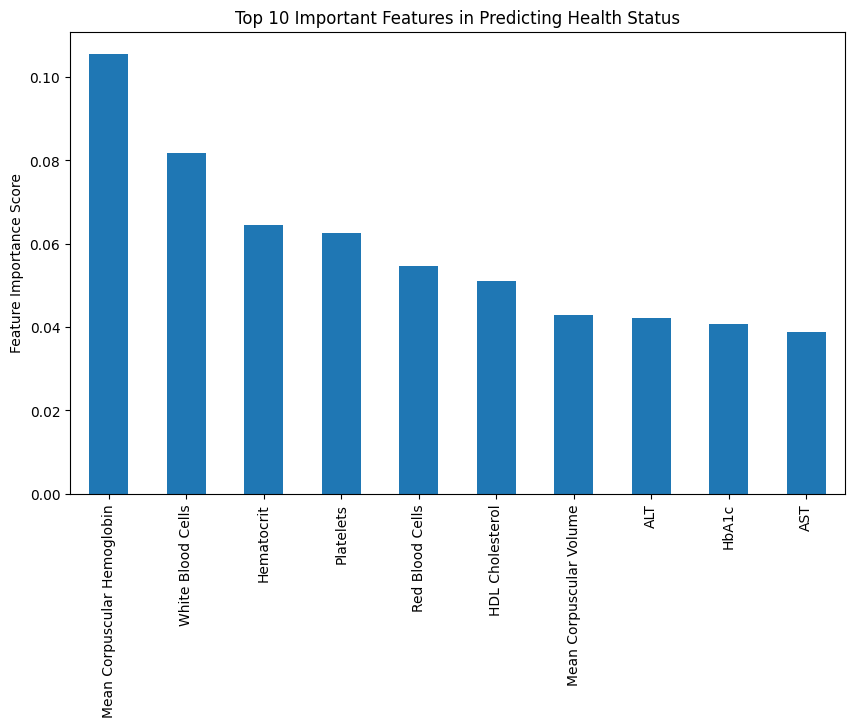


Sorted Feature Importances:
Mean Corpuscular Hemoglobin    0.105627
White Blood Cells              0.081742
Hematocrit                     0.064404
Platelets                      0.062513
Red Blood Cells                0.054692
HDL Cholesterol                0.051017
Mean Corpuscular Volume        0.042793
ALT                            0.042228
HbA1c                          0.040781
AST                            0.038742
dtype: float64


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# If the model is not a RandomForest, retrain a RandomForest to evaluate feature importance
if not isinstance(model, RandomForestClassifier):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_new_scaled, model.predict(X_new_scaled))  # Retrain using the predicted classes from the original model
else:
    rf_model = model  # If it's already a RandomForest

# Get feature importance
importances = rf_model.feature_importances_

# Get feature names and sort by importance
feature_names = X_new.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot the top important features
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar')
plt.title('Top 10 Important Features in Predicting Health Status')
plt.ylabel('Feature Importance Score')
plt.show()

# Display the sorted feature importance
print("\nSorted Feature Importances:")
print(feature_importances.head(10))

**Download as CSV**

In [ ]:
from google.colab import files

# Save the results to a CSV file for download
people_df.to_csv('predicted_health_status.csv', index=False)
files.download('predicted_health_status.csv')